In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
# 设置中文字体
#plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
#plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']  # 使用文泉驿微米黑

### 论文中的数据分析 
Clinical Outcome and Biological Predictors of Relapse After Nephrectomy Only for Very Low-risk Wilms Tumor

极低风险肾母细胞瘤肾切除术后的临床结果和复发的生物学预测因素

链接: https://pmc.ncbi.nlm.nih.gov/articles/PMC5145762/

In [3]:
dt =pd.read_csv("wt_relapsed.csv", sep="\t")
dt

,UPN,Age at Diagnosis (Months),Tumor Weight at Diagnosis (Grams),Histology at Diagnosis,ILN at Diagnosis,PLN at Diagnosis,Time to Relapse (Days)*,Site of First Relapse,Symptoms at Relapse,Chemotherapy,Radiotherapy
0,1,21,250,Mixed,NaN,NaN,68,Lung,No,DD4A,Whole lung
1,78,9,261,Blastemal,NaN,NaN,138,Lungs,No,DD4A,Whole lung
2,154,5,508,Blastemal,NaN,NaN,376,Retroperitoneum,No,DD4A,Flank
3,165,14,505,Blastemal,NaN,NaN,120,Lung,Yes,DD4A,Whole lung
4,399,10,271,Mixed,NaN,NaN,91,Retroperitoneum,No,DD4A,Flank
5,434,3,254,Blastemal,NaN,NaN,94,Right renal fossa,No,DD4A,Delayed Flank
6,450,15,178,Epithelial tubular,NaN,NaN,80,Contra lateral kidney,No,DD4A,Flank
7,476,12,252,Mixed,NaN,NaN,186,Right renal fossa/Lungs,No,DD4A,Flank/Whole lung
8,500,20,490,Mixed,Present-multiple,NaN,178,Abdomen,Yes,DD4A,Whole abdomen
9,508,5,270,Mixed,Present,NaN,1305,Lung,No,DD4A,No


In [4]:
from typing import List

def get_origin_data(x:List[int|float]):
    return ",".join([str(y) for y in sorted(x)])

dt.groupby(["Histology at Diagnosis"])["Time to Relapse (Days)*"].agg(['mean', 'median', 'count', get_origin_data])

,mean,median,count,get_origin_data
Histology at Diagnosis,,,,
Blastemal,182.000000,129.0,4,"94,120,138,376"
Epithelial tubular,80.000000,80.0,1,80
Mixed,311.571429,178.0,7,"68,91,107,178,186,246,1305"


In [5]:
dt["Time to Relapse (Days)*"].agg(['mean', 'median', 'count', get_origin_data]) # 所有的复发案例的平均与中位天数

mean                                                 249.083333
median                                                    129.0
count                                                        12
get_origin_data    68,80,91,94,107,120,138,178,186,246,376,1305
Name: Time to Relapse (Days)*, dtype: object

##### 可以看到对于极低风险(肾母FH型-1期)中的胚芽型的平均复发天数为182天(中位时间129天), 混合型的平均是311天, 上皮型是80天

In [6]:
gene_11p15 = pd.read_csv("11p15.csv", sep="\t")
gene_11p15

,11p15 LOH,Relapse No,Relapse Yes,Total,P*
0,11p15 LOH,32 (80%),8 (20%),40,0.011
1,11p15 LOI,6 (75%),2 (25%),8,NaN
2,11p15 ROI,58 (96.7%),2 (3.3%),60,NaN
3,Total,96 (88.9%),12 (11.1%),108,NaN


####  可以看到肾母FH型-1期中携带11p15 LOH突变的患者有20%的概率会复发, p=0.011说明有统计学意义

#### 乳酸脱氢酶（LDH）趋势图

In [7]:
#!pip install openpyxl
#!pip install seaborn 

In [8]:
!rm -rf ~/.cache/matplotlib

In [10]:
import numpy as np
from pandas import Timestamp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
from matplotlib import font_manager
from matplotlib.dates import DateFormatter

# font_path = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc"  # 常见路径
# font_prop = font_manager.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font_prop.get_name()
# print(f"use {font_prop.get_name()}")
# 1. 设置中文字体（针对Ubuntu/Linux系统）
# try:
#     # 尝试使用文泉驿微米黑
#     plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']
#     # 解决负号显示问题
#     plt.rcParams['axes.unicode_minus'] = False
#     print("use WenQuanYi Micro Hei")
# except:
#     # 如果失败，尝试其他方法
#     try:
#         # 查找系统中可用的中文字体
#         font_path = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc"  # 常见路径
#         font_prop = font_manager.FontProperties(fname=font_path)
#         plt.rcParams['font.family'] = font_prop.get_name()
#         print(f"use {font_prop.get_name()}")
#     except:
#         # 如果还是失败，使用SimHei（可能需要安装）
#         plt.rcParams['font.sans-serif'] = ['SimHei']
#         plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 查看已安装的字体
fonts = [f.name for f in fontManager.ttflist if 'Hei' in f.name or 'Song' in f.name or 'Kai' in f.name]
print("可用的中文字体:", fonts)
plt.rcParams['font.family'] = fonts[0]
sns.set_theme(font=fonts[0])  # 设置seaborn使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

可用的中文字体: ['AR PL UKai CN']


In [11]:
data = pd.read_excel("/home/hkx/data/blog/health/肾母细胞瘤/胡奕涵/胡奕涵肾母化疗.xlsx", sheet_name="重要检查指标")
data['时间'] = data['日期']
data['日期'] = pd.to_datetime(data['日期'])
#data["日期"]=data["日期"].apply(lambda x:x.strftime('%m/%d'))
data

,日期,乳酸脱氢酶(U/L),神经元特异性烯醇化酶(ng/ml),医院,备注,时间
0,2025-03-22,348.0,NaN,同济,3.26左肾切除手术,2025-03-22
1,2025-03-24,NaN,29.75,同济,NaN,2025-03-24
2,2025-04-04,315.0,NaN,同济,乳酸脱氢酶术后在缓慢升高?,2025-04-04
3,2025-04-15,330.0,NaN,同济,NaN,2025-04-15
4,2025-04-22,347.0,NaN,同济,NaN,2025-04-22
5,2025-05-06,352.0,18.90,北儿,"北儿上限420,同济250",2025-05-06
6,2025-05-19,304.0,NaN,北儿,NaN,2025-05-19


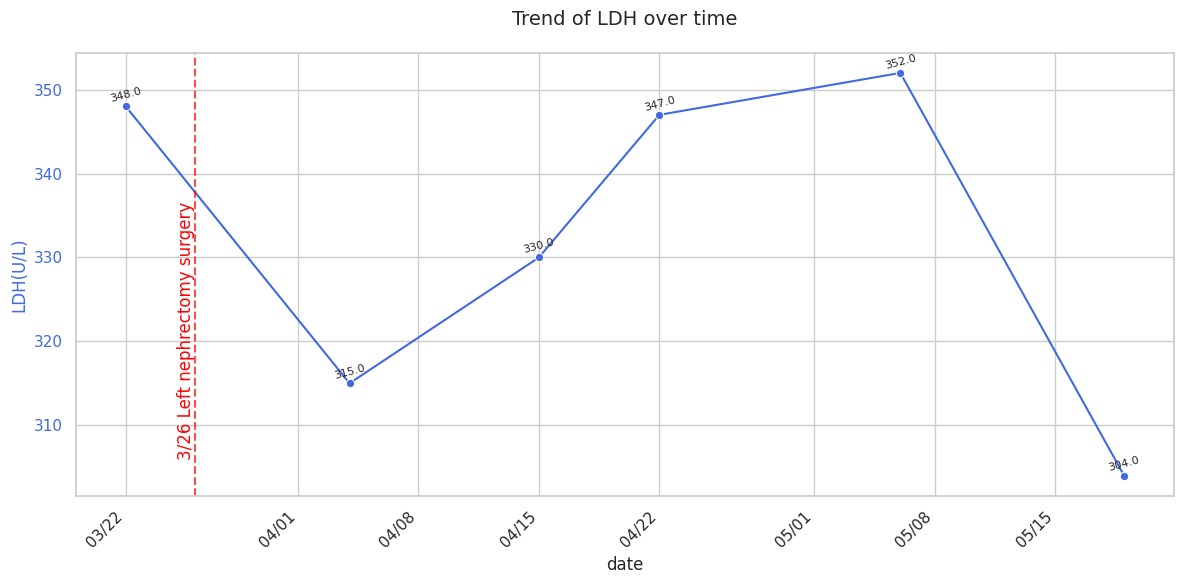

In [13]:
# 创建图表
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
#surgery_date = pd.to_datetime('2025-03-26').strftime("%m/%d")
surgery_date: Timestamp = pd.to_datetime('2025-03-26')

# 绘制折线图（只绘制有乳酸脱氢酶数据的点）
#lineplot = sns.lineplot(data=data.dropna(subset=['乳酸脱氢酶(U/L)']), x='时间', y='乳酸脱氢酶(U/L)', marker='o', color='royalblue', label='乳酸脱氢酶(U/L)')
ax = plt.gca()  # 第一个y轴（乳酸脱氢酶）
#ax2 = ax.twinx()  # 第二个y轴（神经元特异性烯醇化酶）
line1=sns.lineplot(x='日期', y='乳酸脱氢酶(U/L)', data=data, marker='o', color='royalblue')
#line2=sns.lineplot(x='日期', y='神经元特异性烯醇化酶(ng/ml)', data=data, marker='s', color='darkorange')
                #label='乳酸脱氢酶(U/L)')
# 添加数据点标签
for i, row in data.dropna(subset=['乳酸脱氢酶(U/L)']).iterrows():
    ax.text(x=row['日期'], y=row['乳酸脱氢酶(U/L)']+0.5, s=f"{row['乳酸脱氢酶(U/L)']}", ha='center', fontsize=8,rotation=15)
# for i, row in data.dropna(subset=['神经元特异性烯醇化酶(ng/ml)']).iterrows():
#     ax.text(x=row['日期'], y=row['神经元特异性烯醇化酶(ng/ml)']+0.5, s=f"{row['神经元特异性烯醇化酶(ng/ml)']}", ha='center', fontsize=8,rotation=15)

# 添加手术日期竖线
ax.axvline(x=surgery_date, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax.text(x=surgery_date, y=plt.ylim()[1]*0.95, s='3/26 Left nephrectomy surgery', rotation=90, color='red', ha='right', va='top')


# 添加标题和标签
ax.set_ylabel('LDH(U/L)', fontsize=12,  color='royalblue')
#ax2.set_ylabel('神经元特异性烯醇化酶(ng/ml)', color='darkorange', fontsize=12)

ax.tick_params(axis='y', colors='royalblue')
#ax2.tick_params(axis='y', colors='darkorange')

ax.set_xlabel('date', fontsize=12)
# 调整x轴日期显示格式
# 修改x轴日期格式为 月-日
ax.xaxis.set_major_formatter(DateFormatter("%m/%d"))

# 合并图例
#lines = [line1.lines[0], line2.lines[0]] 
#labels = [line.get_label() for line in lines]
#ax.legend(lines, labels, loc='upper left')

plt.title('Trend of LDH over time', fontsize=14, pad=20)
plt.gcf().autofmt_xdate(rotation=45)
# 显示图表
plt.tight_layout()
plt.show()

#surge_y = np.arange(data["乳酸脱氢酶(U/L)"].min(), data["乳酸脱氢酶(U/L)"].max(), 1)
#surge_xs = [pd.to_datetime("2025-03-26").strftime("%m/%d") for i in surge_y]
#sns.lineplot(x=surge_xs, y=surge_y, color='red', label='手术时间')
#plt.savefig('ldh.png', dpi=600, bbox_inches='tight')

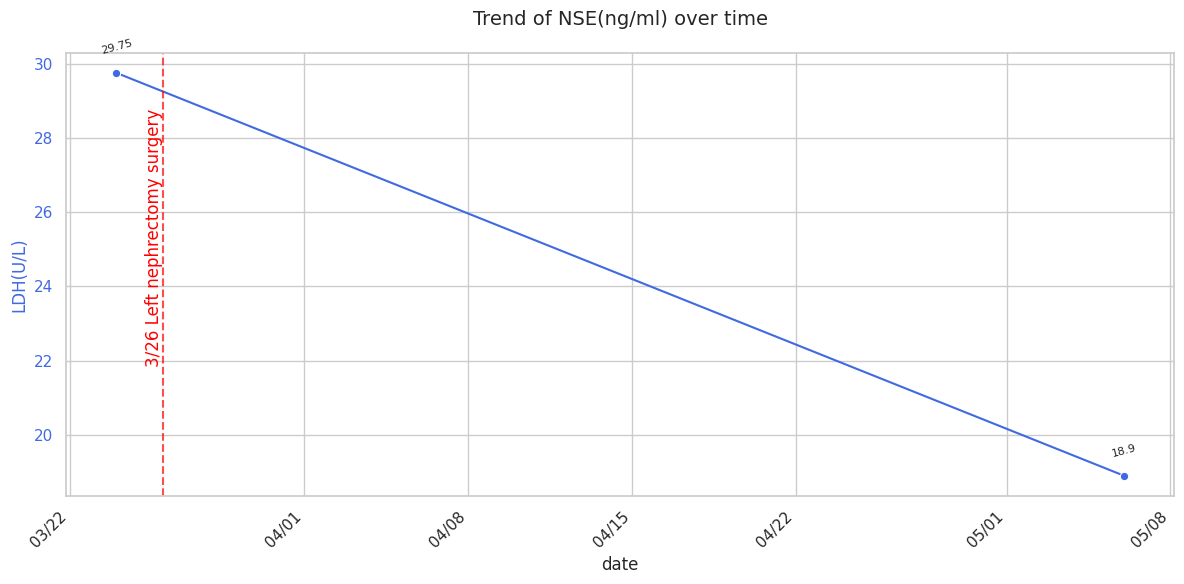

In [14]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
#surgery_date = pd.to_datetime('2025-03-26').strftime("%m/%d")
surgery_date: Timestamp = pd.to_datetime('2025-03-26')

# 绘制折线图（只绘制有神经元特异性烯醇化酶(ng/ml)数据的点）
ax = plt.gca()  # 第一个y轴（神经元特异性烯醇化酶(ng/ml)）
line1=sns.lineplot(x='日期', y='神经元特异性烯醇化酶(ng/ml)', data=data, marker='o', color='royalblue')

# 添加数据点标签
for i, row in data.dropna(subset=['神经元特异性烯醇化酶(ng/ml)']).iterrows():
    ax.text(x=row['日期'], y=row['神经元特异性烯醇化酶(ng/ml)']+0.5, s=f"{row['神经元特异性烯醇化酶(ng/ml)']}", ha='center', fontsize=8,rotation=15)


# 添加手术日期竖线
ax.axvline(x=surgery_date, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax.text(x=surgery_date, y=plt.ylim()[1]*0.95, s='3/26 Left nephrectomy surgery', rotation=90, color='red', ha='right', va='top')


# 添加标题和标签
ax.set_ylabel('LDH(U/L)', fontsize=12,  color='royalblue')

ax.tick_params(axis='y', colors='royalblue')

ax.set_xlabel('date', fontsize=12)
# 调整x轴日期显示格式
# 修改x轴日期格式为 月-日
ax.xaxis.set_major_formatter(DateFormatter("%m/%d"))


plt.title('Trend of NSE(ng/ml) over time', fontsize=14, pad=20)
plt.gcf().autofmt_xdate(rotation=45)
# 显示图表
plt.tight_layout()
plt.show()